In [2]:
import pandas as pd

In [3]:
data_stock = pd.read_csv("C:/Users/HP/Downloads/CAT.csv")

In [4]:
data_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,7.234375,7.359375,7.218750,7.359375,3.260038,2910400
1,1990-01-03,7.421875,7.515625,7.421875,7.437500,3.294647,5712000
2,1990-01-04,7.437500,7.484375,7.421875,7.468750,3.308488,2397600
3,1990-01-05,7.468750,7.468750,7.390625,7.421875,3.287722,2043200
4,1990-01-08,7.421875,7.421875,7.328125,7.375000,3.266959,1340800


In [5]:
data_stock = data_stock[['Date','Close']]

In [6]:
data_stock.head()

,Date,Close
0,1990-01-02,7.359375
1,1990-01-03,7.437500
2,1990-01-04,7.468750
3,1990-01-05,7.421875
4,1990-01-08,7.375000


In [7]:
macro_data = pd.read_csv("C:/Users/HP/Downloads/US_macroeconomics.csv")

In [8]:
macro_data.head()

,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings
0,1980-11-01,85.6,14.2050,7.5,200.685556,4976.5,1826.8,11.6
1,1980-12-01,86.4,14.7900,7.2,198.398636,4999.8,1851.7,11.4
2,1981-01-01,87.2,14.9040,7.5,198.817619,4980.4,1870.0,10.9
3,1981-02-01,88.0,15.1325,7.4,194.852105,4965.0,1884.2,10.8
4,1981-03-01,88.6,15.4000,7.4,203.593182,4979.0,1902.9,10.8


In [9]:
macro_data.tail()

,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings
494,2022-01-01,281.933,3.4450,4.0,14531.377500,15163.5,16543.3,5.8
495,2022-02-01,284.182,3.7625,3.8,13898.727895,15173.6,16635.8,5.8
496,2022-03-01,287.708,4.1720,3.6,13623.263043,15119.6,16831.2,5.3
497,2022-04-01,288.663,4.9825,3.6,13394.163000,15154.4,16911.2,5.2
498,2022-05-01,291.474,5.2300,3.6,11829.729524,15144.8,16954.5,5.4


In [11]:
macro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              499 non-null    object 
 1   CPI                               499 non-null    float64
 2   Mortgage_rate                     499 non-null    float64
 3   Unemp_rate                        499 non-null    float64
 4   NASDAQ                            499 non-null    float64
 5   disposable_income                 499 non-null    float64
 6   Personal_consumption_expenditure  499 non-null    float64
 7   personal_savings                  499 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.3+ KB


In [26]:
raw_material = pd.read_csv("C:/Users/HP/Downloads/PINDUINDEXM.csv")

In [27]:
raw_material.head()

,DATE,PINDUINDEXM
0,1992-01-01,52.723883
1,1992-02-01,53.988902
2,1992-03-01,54.023533
3,1992-04-01,55.436578
4,1992-05-01,55.354037


In [28]:
raw_material.tail()

,DATE,PINDUINDEXM
378,2023-07-01,157.406576
379,2023-08-01,154.700611
380,2023-09-01,159.823049
381,2023-10-01,157.867112
382,2023-11-01,163.736299


In [29]:
federal_rate = pd.read_csv("C:/Users/HP/Downloads/FEDFUNDS.csv")

In [30]:
federal_rate.head()

,DATE,FEDFUNDS
0,1990-01-01,8.23
1,1990-02-01,8.24
2,1990-03-01,8.28
3,1990-04-01,8.26
4,1990-05-01,8.18


In [32]:
data_stock['Date']=pd.to_datetime(data_stock['Date'])
macro_data['date']=pd.to_datetime(macro_data['date'])
raw_material['DATE']=pd.to_datetime(raw_material['DATE'])
federal_rate['DATE']=pd.to_datetime(federal_rate['DATE'])

In [35]:
data_stock['YearMonth'] = data_stock['Date'].dt.to_period('M')

In [34]:
macro_data['YearMonth'] = macro_data['date'].dt.to_period('M')
raw_material['YearMonth'] = raw_material['DATE'].dt.to_period('M')
federal_rate['YearMonth'] = federal_rate['DATE'].dt.to_period('M')

In [36]:
df_combined = pd.merge(data_stock, macro_data, how='left', on='YearMonth')
df_combined = pd.merge(df_combined, raw_material, how='left', on='YearMonth')
df_combined = pd.merge(df_combined, federal_rate, how='left', on='YearMonth')

In [37]:
df_combined.head()

,Date,Close,YearMonth,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,DATE_x,PINDUINDEXM,DATE_y,FEDFUNDS
0,1990-01-02,7.359375,1990-01,1990-01-01,127.5,9.895,5.4,439.350455,6801.0,3730.7,8.0,NaT,NaN,1990-01-01,8.23
1,1990-01-03,7.437500,1990-01,1990-01-01,127.5,9.895,5.4,439.350455,6801.0,3730.7,8.0,NaT,NaN,1990-01-01,8.23
2,1990-01-04,7.468750,1990-01,1990-01-01,127.5,9.895,5.4,439.350455,6801.0,3730.7,8.0,NaT,NaN,1990-01-01,8.23
3,1990-01-05,7.421875,1990-01,1990-01-01,127.5,9.895,5.4,439.350455,6801.0,3730.7,8.0,NaT,NaN,1990-01-01,8.23
4,1990-01-08,7.375000,1990-01,1990-01-01,127.5,9.895,5.4,439.350455,6801.0,3730.7,8.0,NaT,NaN,1990-01-01,8.23


In [43]:
df_combined = df_combined.dropna(subset=['PINDUINDEXM'])
df_combined = df_combined.dropna(subset=['CPI'])
df_combined = df_combined.dropna(subset=['FEDFUNDS'])

In [44]:
df_combined

,Date,Close,YearMonth,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,DATE_x,PINDUINDEXM,DATE_y,FEDFUNDS
506,1992-01-02,5.453125,1992-01,1992-01-01,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,1992-01-01,52.723883,1992-01-01,4.03
507,1992-01-03,5.437500,1992-01,1992-01-01,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,1992-01-01,52.723883,1992-01-01,4.03
508,1992-01-06,5.453125,1992-01,1992-01-01,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,1992-01-01,52.723883,1992-01-01,4.03
509,1992-01-07,5.484375,1992-01,1992-01-01,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,1992-01-01,52.723883,1992-01-01,4.03
510,1992-01-08,5.453125,1992-01,1992-01-01,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,1992-01-01,52.723883,1992-01-01,4.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,2022-05-24,205.649994,2022-05,2022-05-01,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,2022-05-01,187.213206,2022-05-01,0.77
8163,2022-05-25,209.309998,2022-05,2022-05-01,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,2022-05-01,187.213206,2022-05-01,0.77
8164,2022-05-26,212.990005,2022-05,2022-05-01,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,2022-05-01,187.213206,2022-05-01,0.77
8165,2022-05-27,217.139999,2022-05,2022-05-01,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,2022-05-01,187.213206,2022-05-01,0.77


In [46]:
df_combined = df_combined.drop(['date', 'DATE_x','DATE_y','YearMonth'], axis=1)

In [47]:
df_combined

,Date,Close,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,PINDUINDEXM,FEDFUNDS
506,1992-01-02,5.453125,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03
507,1992-01-03,5.437500,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03
508,1992-01-06,5.453125,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03
509,1992-01-07,5.484375,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03
510,1992-01-08,5.453125,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03
...,...,...,...,...,...,...,...,...,...,...,...
8162,2022-05-24,205.649994,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77
8163,2022-05-25,209.309998,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77
8164,2022-05-26,212.990005,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77
8165,2022-05-27,217.139999,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77


In [48]:
# Extraire différentes informations temporelles
df_combined['day_of_month'] = df_combined['Date'].dt.day
df_combined['day_of_week'] = df_combined['Date'].dt.dayofweek  # 0 pour lundi, 1 pour mardi, etc.
df_combined['Month'] = df_combined['Date'].dt.month
df_combined['Year'] = df_combined['Date'].dt.year

In [49]:
df_combined

,Date,Close,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,PINDUINDEXM,FEDFUNDS,day_of_month,day_of_week,Month,Year
506,1992-01-02,5.453125,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,2,3,1,1992
507,1992-01-03,5.437500,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,3,4,1,1992
508,1992-01-06,5.453125,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,6,0,1,1992
509,1992-01-07,5.484375,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,7,1,1,1992
510,1992-01-08,5.453125,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,8,2,1,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,2022-05-24,205.649994,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77,24,1,5,2022
8163,2022-05-25,209.309998,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77,25,2,5,2022
8164,2022-05-26,212.990005,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77,26,3,5,2022
8165,2022-05-27,217.139999,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77,27,4,5,2022


In [50]:
close = df_combined.pop('Close')
df_combined['Close'] = close

In [51]:
df_combined

,Date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,PINDUINDEXM,FEDFUNDS,day_of_month,day_of_week,Month,Year,Close
506,1992-01-02,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,2,3,1,1992,5.453125
507,1992-01-03,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,3,4,1,1992,5.437500
508,1992-01-06,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,6,0,1,1992,5.453125
509,1992-01-07,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,7,1,1,1992,5.484375
510,1992-01-08,138.300,8.432,7.3,615.734091,7065.3,4084.7,9.4,52.723883,4.03,8,2,1,1992,5.453125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,2022-05-24,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77,24,1,5,2022,205.649994
8163,2022-05-25,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77,25,2,5,2022,209.309998
8164,2022-05-26,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77,26,3,5,2022,212.990005
8165,2022-05-27,291.474,5.230,3.6,11829.729524,15144.8,16954.5,5.4,187.213206,0.77,27,4,5,2022,217.139999


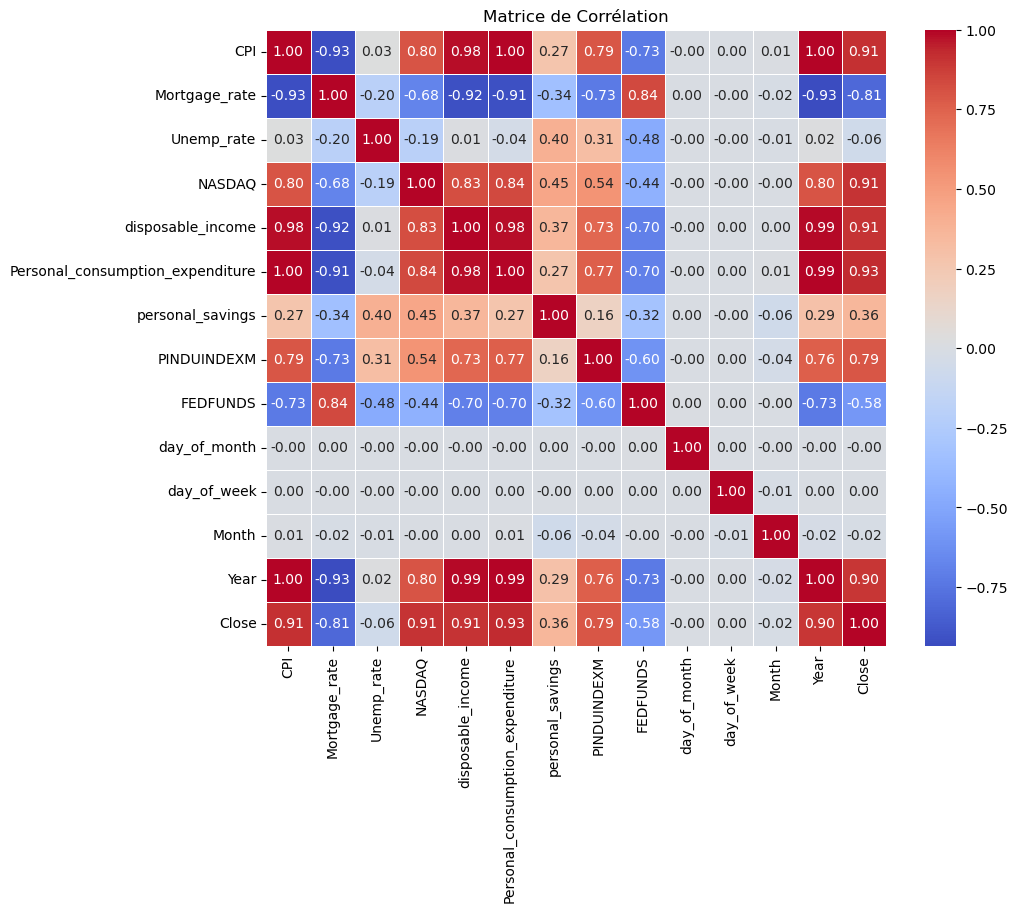

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

matrice_corr = df_combined.corr()
# Créer une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

In [56]:
X = df_combined[['CPI', 'Mortgage_rate', 'Unemp_rate' ,'NASDAQ' ,'disposable_income' ,'Personal_consumption_expenditure', 'personal_savings' ,'PINDUINDEXM' ,'FEDFUNDS', 'day_of_month' ,'day_of_week','Month','Year']]
y = df_combined['Close']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 4.6 MB/s eta 0:00:00


In [62]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [63]:
model = xgb.XGBRegressor()

In [64]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred = model.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)

# Afficher les performances
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 3.05


In [67]:
print(y_pred)

[111.67233   23.731451  12.319233 ...  71.65634   26.024609  83.35285 ]


In [69]:
print(y_test)

5567    110.519997
2977     23.195000
1306     12.187500
5934     85.650002
1912     27.500000
           ...    
4223     65.800003
6065     91.290001
6479     74.059998
2156     28.125000
6367     80.680000
Name: Close, Length: 1533, dtype: float64
